<a href="https://colab.research.google.com/github/pravin435916/ML_Projects/blob/main/C4_P3_58_Pravin_nandankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Pravin Nandankar

# Aim :- To analyze and predict house prices using the square footage of living area (sqft_living) as the key feature by:

##### Applying Linear Regression to predict the actual house prices.

##### Applying Logistic Regression to classify houses as "Affordable" or "Expensive" based on whether the price is above the average.

##### This approach helps in both estimating house values and categorizing them for better real estate decision-making.

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix,accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv("/content/House_price_data.csv")  # Replace with your actual filename
df.head()  # View the first few rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Dataset Description

This dataset contains information about house sales, including various features that can be used to predict house prices. The columns include:

- **date**: Date of the house sale.
- **price**: The sale price of the house (target variable).
- **bedrooms**: Number of bedrooms.
- **bathrooms**: Number of bathrooms.
- **sqft_living**: Square footage of the living area.
- **sqft_lot**: Square footage of the lot area.
- **floors**: Number of floors.
- **waterfront**: Whether the house has a waterfront view (binary: 0 or 1).
- **view**: Number of times the house has been viewed.
- **condition**: Condition of the house (e.g., 1-5).
- **sqft_above**: Square footage of the area above the basement.
- **sqft_basement**: Square footage of the basement area.
- **yr_built**: Year the house was built.
- **yr_renovated**: Year the house was renovated.
- **street**: Street address.
- **city**: City.
- **statezip**: State and zip code.
- **country**: Country.

In [31]:
df.shape

(4600, 18)

In [32]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Linear Regression

### Problem Definition (Linear Regression)

Using `sqft_living` as the independent variable, we are trying to predict the `price` of houses.

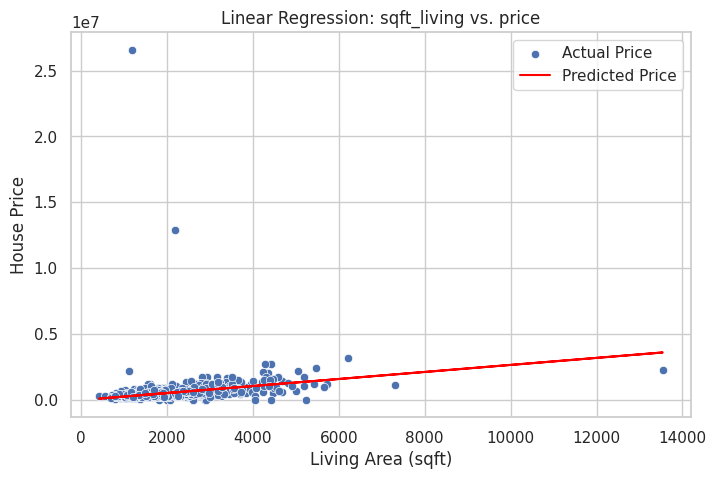

Mean Squared Error (MSE): 990,204,087,727.14
R² Score: 0.03


In [26]:
# Feature and target
X = df[['sqft_living']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['sqft_living'], y=y_test, label='Actual Price')
plt.plot(X_test['sqft_living'], y_pred, color='red', label='Predicted Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Price')
plt.title('Linear Regression: sqft_living vs. price')
plt.legend()
plt.show()

# Evaluation
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Logistic Regression

### Problem Definition (Logistic Regression)

Using `sqft_living` as the independent variable, we are trying to classify houses as "Affordable" or "Expensive" based on whether the price is above the average (`price_binary`).

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       582
           1       0.74      0.60      0.66       338

    accuracy                           0.78       920
   macro avg       0.77      0.74      0.75       920
weighted avg       0.77      0.78      0.77       920



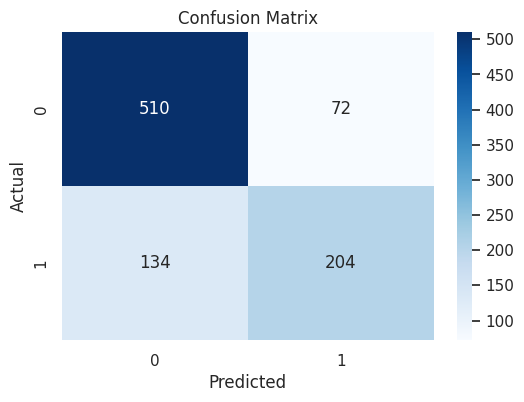

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


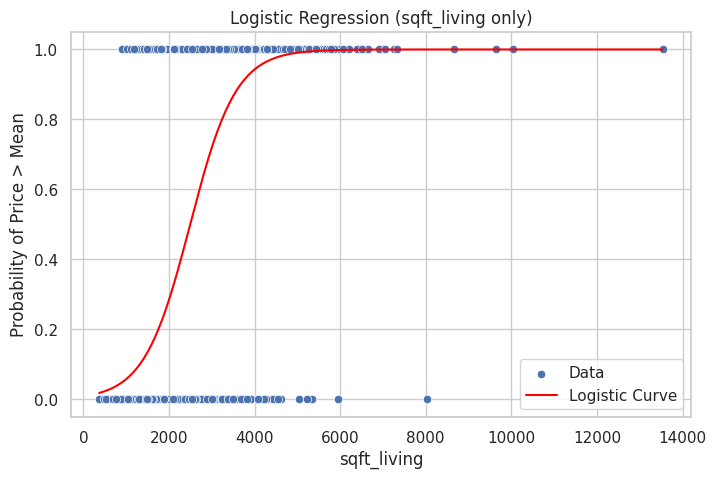

In [24]:
# Create binary target: 1 if price > mean price, else 0
df['price_binary'] = (df['price'] > df['price'].mean()).astype(int)

# Select features (you can add more features if needed)
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'yr_built']
X = df[features]
y = df['price_binary']

# Handle missing values (if any)
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization: ONLY for sqft_living vs probability
X_single = df[['sqft_living']]
y_single = df['price_binary']

# Train again using only sqft_living
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)
log_reg_single = LogisticRegression()
log_reg_single.fit(X_train_s, y_train_s)

# Create range for sqft_living to visualize probability curve
X_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)
probs = log_reg_single.predict_proba(X_range)[:, 1]

# Plot logistic curve
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_single['sqft_living'], y=y_single, label='Data')
plt.plot(X_range, probs, color='red', label='Logistic Curve')
plt.xlabel('sqft_living')
plt.ylabel('Probability of Price > Mean')
plt.title('Logistic Regression (sqft_living only)')
plt.legend()
plt.show()